In [34]:
import logging
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from utilsforecast.plotting import plot_series

from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS

In [35]:
logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)

In [38]:
Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')
Y_df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [42]:
Y_df = Y_df.query("unique_id == 'H1'")
Y_df.shape


(748, 3)

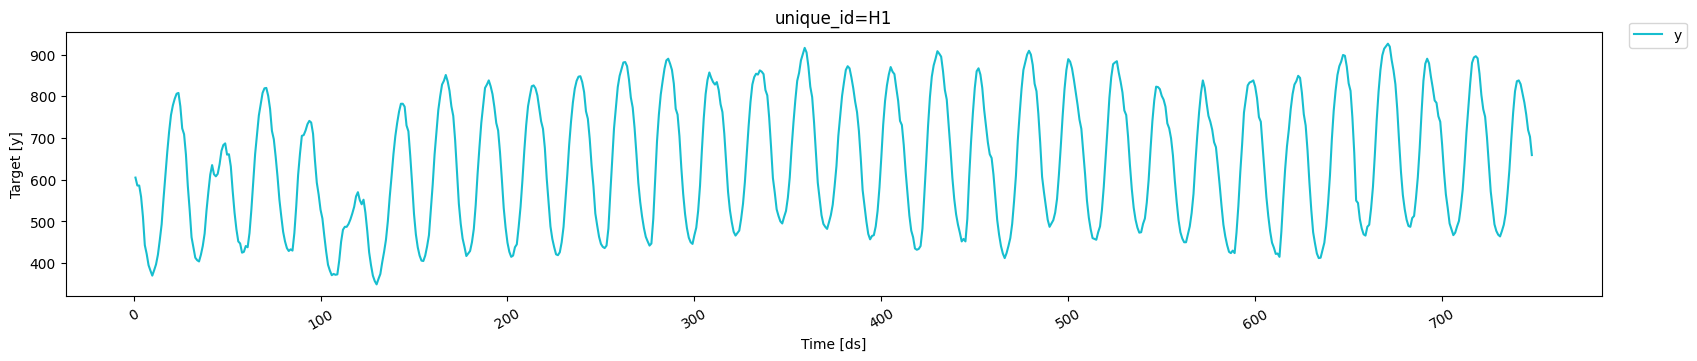

In [40]:
plot_series(Y_df)

In [43]:
h = 100
nf = NeuralForecast(models=[NHITS(h=h, input_size=2*h, max_steps=500, enable_progress_bar=False, logger=False)], freq=1);
cv_df = nf.cross_validation(Y_df, n_windows=4, step_size=h, verbose=0)
cv_df.head()

Seed set to 1
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,cutoff,NHITS,y
unique_id,,,,
H1,349,348,536.419434,525.0
H1,350,348,565.881226,557.0
H1,351,348,629.577271,605.0
H1,352,348,704.607239,676.0
H1,353,348,779.814270,737.0


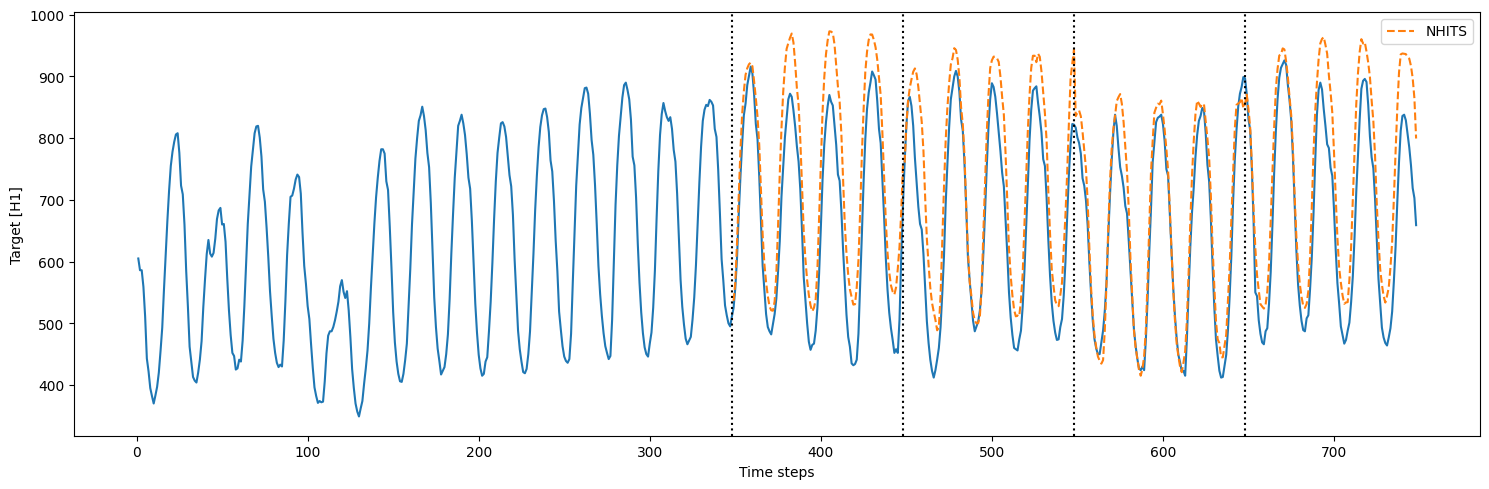

In [44]:
cutoffs = cv_df['cutoff'].unique()

plt.figure(figsize=(15,5))
plt.plot(Y_df['ds'], Y_df['y'])
plt.plot(cv_df['ds'], cv_df['NHITS'], label='NHITS', ls='--')

for cutoff in cutoffs:
    plt.axvline(x=cutoff, color='black', ls=':')

plt.xlabel('Time steps')
plt.ylabel('Target [H1]')
plt.legend()
plt.tight_layout()

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.utils import AirPassengersDF as Y_df

In [54]:
# Split train/test and declare time series dataset
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31']   # 12 test
dataset, *_ = TimeSeriesDataset.from_df(Y_train_df)


### 1. Automatic Forecasting

In [55]:
from neuralforecast.auto import *

In [56]:

# Optuna
model = AutoRNN(h=12, config=None, num_samples=1, cpus=1, backend='optuna')
model = AutoLSTM(h=12, config=None, backend='optuna')
model = AutoGRU(h=12, config=None, backend='optuna')
model = AutoTCN(h=12, config=None, backend='optuna')
model = AutoDeepAR(h=12, config=None, backend='optuna')
model = AutoBiTCN(h=12, config=None, backend='optuna')
model = AutoMLP(h=12, config=None, backend='optuna')
model = AutoNBEATS(h=12, config=None, backend='optuna')
model = AutoNBEATSx(h=12, config=None, backend='optuna')
model = AutoNHITS(h=12, config=None, backend='optuna')
model = AutoDLinear(h=12, config=None, backend='optuna')
model = AutoNLinear(h=12, config=None, backend='optuna')
model = AutoTiDE(h=12, config=None, backend='optuna')
model = AutoDeepNPTS(h=12, config=None, backend='optuna')
model = AutoKAN(h=12, config=None, backend='optuna')
model = AutoTFT(h=12, config=None, backend='optuna')
model = AutoVanillaTransformer(h=12, config=None, backend='optuna')
model = AutoInformer(h=12, config=None, backend='optuna')
model = AutoAutoformer(h=12, config=None, backend='optuna')
model = AutoFEDformer(h=12, config=None, backend='optuna')
model = AutoPatchTST(h=12, config=None, backend='optuna')
model = AutoiTransformer(h=12, n_series=1, config=None, backend='optuna')
model = AutoTimesNet(h=12, config=None, backend='optuna')
model = AutoStemGNN(h=12, n_series=1, config=None, backend='optuna')


model.fit(dataset=dataset)
y_hat = model.predict(dataset=dataset)
Y_hat_insample = nf.predict_insample(step_size=horizon)

[I 2025-02-18 21:41:17,832] A new study created in memory with name: no-name-447cfa4f-6169-4b64-b7e8-5db809aeb6e2
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 18


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

[I 2025-02-18 21:41:25,362] Trial 0 finished with value: 0.48599448800086975 and parameters: {'n_stacks': 2, 'multi_layer': 3, 'learning_rate': 0.00027628296076602477, 'scaler_type': 'robust', 'max_steps': 1000, 'batch_size': 32, 'random_seed': 18, 'input_size': 36, 'step_size': 12}. Best is trial 0 with value: 0.48599448800086975.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 19


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:41:54,168] Trial 1 finished with value: 0.9219345450401306 and parameters: {'n_stacks': 2, 'multi_layer': 7, 'learning_rate': 0.0016435884974343687, 'scaler_type': 'standard', 'max_steps': 2000, 'batch_size': 64, 'random_seed': 19, 'input_size': 48, 'step_size': 1}. Best is trial 0 with value: 0.48599448800086975.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 8


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:42:08,982] Trial 2 finished with value: 2.481951951980591 and parameters: {'n_stacks': 2, 'multi_layer': 5, 'learning_rate': 0.004236149738047056, 'scaler_type': 'robust', 'max_steps': 2000, 'batch_size': 128, 'random_seed': 8, 'input_size': 12, 'step_size': 1}. Best is trial 0 with value: 0.48599448800086975.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 8


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:42:12,636] Trial 3 finished with value: 0.4779476225376129 and parameters: {'n_stacks': 2, 'multi_layer': 3, 'learning_rate': 0.00010768551725704877, 'scaler_type': 'standard', 'max_steps': 500, 'batch_size': 64, 'random_seed': 8, 'input_size': 36, 'step_size': 12}. Best is trial 3 with value: 0.4779476225376129.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 4


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:42:19,808] Trial 4 finished with value: 160.3988800048828 and parameters: {'n_stacks': 2, 'multi_layer': 3, 'learning_rate': 0.0002546516732666916, 'scaler_type': None, 'max_steps': 1000, 'batch_size': 64, 'random_seed': 4, 'input_size': 24, 'step_size': 1}. Best is trial 3 with value: 0.4779476225376129.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 8


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:42:38,763] Trial 7 finished with value: 0.47714805603027344 and parameters: {'n_stacks': 2, 'multi_layer': 7, 'learning_rate': 0.0018696523459803946, 'scaler_type': 'standard', 'max_steps': 500, 'batch_size': 256, 'random_seed': 17, 'input_size': 36, 'step_size': 12}. Best is trial 5 with value: 0.3759803771972656.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 9


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:42:46,155] Trial 8 finished with value: 1.4384546279907227 and parameters: {'n_stacks': 2, 'multi_layer': 5, 'learning_rate': 0.00012098746087488544, 'scaler_type': 'robust', 'max_steps': 1000, 'batch_size': 32, 'random_seed': 9, 'input_size': 24, 'step_size': 1}. Best is trial 5 with value: 0.3759803771972656.
/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  v = trial.suggest_loguniform(k, v.lower, v.upper)
Seed set to 19


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

[I 2025-02-18 21:43:13,291] Trial 9 finished with value: 123.6315689086914 and parameters: {'n_stacks': 2, 'multi_layer': 7, 'learning_rate': 0.04682175195543714, 'scaler_type': None, 'max_steps': 2000, 'batch_size': 64, 'random_seed': 19, 'input_size': 48, 'step_size': 12}. Best is trial 5 with value: 0.3759803771972656.
Seed set to 8


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

Validation: |                                                                                                 …

Predicting: |                                                                                                 …

/home/pranav-pc/.cache/pypoetry/virtualenvs/ts-EBaOKu-T-py3.12/lib/python3.12/site-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [46]:
from utilsforecast.plotting import plot_series

,ds,cutoff,NHITS,y
unique_id,,,,
H1,9,8,0.041622,382.0
H1,10,8,0.039169,370.0
H1,11,8,-0.018404,383.0
H1,12,8,0.032768,397.0
H1,13,8,-0.032404,420.0
...,...,...,...,...
H1,344,248,533.300049,529.0
H1,345,248,512.930969,513.0
H1,346,248,498.850098,500.0


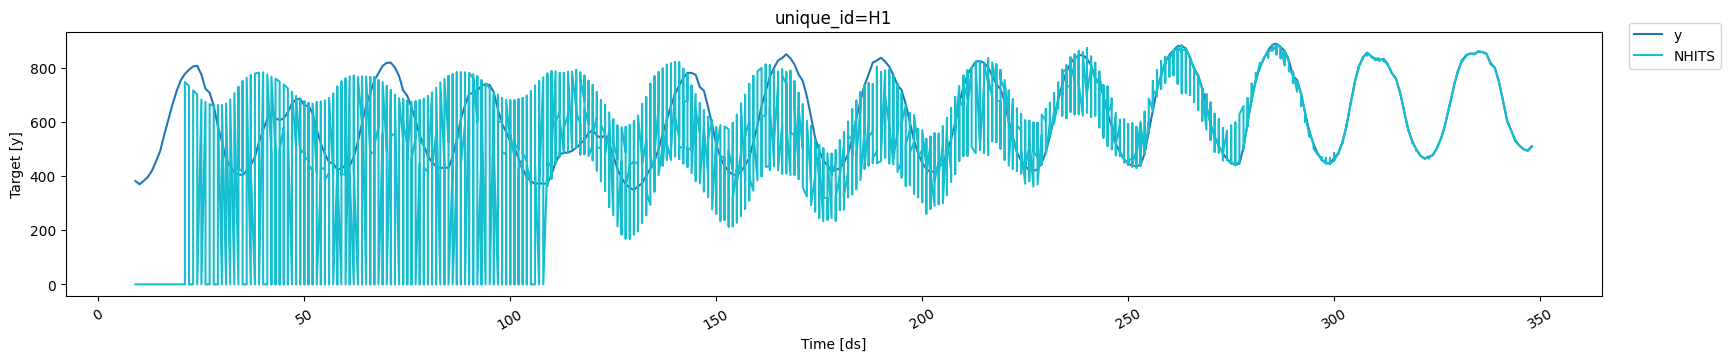

In [58]:
plot_series(forecasts_df=Y_hat_insample.reset_index().drop(columns='cutoff'))